# Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Libraries

In [2]:
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Data Preprocessing

Source of data:  https://www.dropbox.com/sh/gaw6vh6qusoyms6/AADwWi0Tp3E3M4B2xzeGlsEna?dl=0

In [3]:
train_parent_dir = "gdrive/My Drive/Datasets/EE610: Image Processing/train"
test_parent_dir = "gdrive/My Drive/Datasets/EE610: Image Processing/val"
img_directory = "image"
depth_directory = "depth"

train_img_path = os.path.join(train_parent_dir, img_directory)
train_img_path_files = os.listdir(train_img_path)
# sorting the files based on their filenames
train_img_path_files = sorted(train_img_path_files,key=lambda i: int(os.path.splitext(i)[0]))
train_images=[]
for i in train_img_path_files:
  train_images.append(os.path.join(train_img_path,i))

train_depth_path = os.path.join(train_parent_dir, depth_directory)
train_depth_path_files = os.listdir(train_depth_path)
train_depth_path_files = sorted(train_depth_path_files,key=lambda i: int(os.path.splitext(i)[0]))
train_depths=[]
for i in train_depth_path_files:
  train_depths.append(os.path.join(train_depth_path,i))

test_img_path = os.path.join(test_parent_dir, img_directory)
test_img_path_files = os.listdir(test_img_path)
test_img_path_files = sorted(test_img_path_files,key=lambda i: int(os.path.splitext(i)[0]))
test_images=[]
for i in test_img_path_files:
  test_images.append(os.path.join(test_img_path,i))

test_depth_path = os.path.join(test_parent_dir, depth_directory)
test_depth_path_files = os.listdir(test_depth_path)
test_depth_path_files = sorted(test_depth_path_files,key=lambda i: int(os.path.splitext(i)[0]))
test_depths=[]
for i in test_depth_path_files:
  test_depths.append(os.path.join(test_depth_path,i))

number_of_train_data = len(train_images)
number_of_test_data = len(test_images)

print("Number of training data: ", number_of_train_data)
print("Number of test data: ",number_of_test_data)

Number of training data:  2975
Number of test data:  500


In [4]:
train_img = [np.load(train_images[i]) for i in range(number_of_train_data)]
print("Shape of training data: ", np.array(train_img).shape)
test_img = [np.load(test_images[i]) for i in range(number_of_test_data)]
print("Shape of test data: ", np.array(test_img).shape)

Shape of training data:  (2975, 128, 256, 3)
Shape of test data:  (500, 128, 256, 3)


In [5]:
train_depth  = [np.load(train_depths[i]) for i in range(len(train_depths))]
print("Shape of depth map (ground truth) used for training: ",np.array(train_depth).shape)
test_depth  = [np.load(test_depths[i]) for i in range(len(test_depths))]
print("Shape of depth map (ground truth) used for testing: ",np.array(test_depth).shape)

Shape of depth map (ground truth) used for training:  (2975, 128, 256, 1)
Shape of depth map (ground truth) used for testing:  (500, 128, 256, 1)


In [6]:
# Convert all the data into numpy array format
X_train = np.asarray(train_img)
y_train = np.asarray(train_depth)
X_test = np.asarray(test_img)
y_test = np.asarray(test_depth)

### Display images and its corresponding depth maps

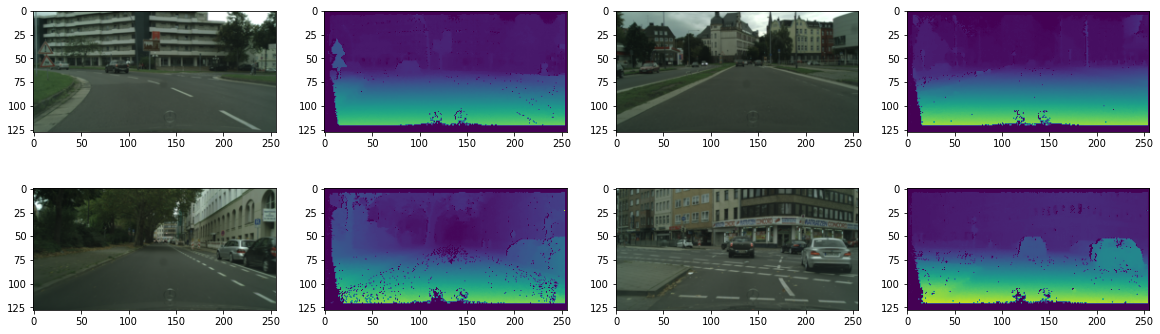

In [7]:
image_disp = X_train[:4,:,:,:]
depth_disp = y_train[:4,:,:,:].squeeze()

plt.figure(figsize=(20,6))

plt.subplot(2,4,1)
plt.imshow(image_disp[0,:,:,:])
plt.subplot(2,4,2)
plt.imshow(depth_disp[0,:,:])

plt.subplot(2,4,3)
plt.imshow(image_disp[1,:,:,:])
plt.subplot(2,4,4)
plt.imshow(depth_disp[1,:,:])

plt.subplot(2,4,5)
plt.imshow(image_disp[2,:,:,:])
plt.subplot(2,4,6)
plt.imshow(depth_disp[2,:,:])

plt.subplot(2,4,7)
plt.imshow(image_disp[3,:,:,:])
plt.subplot(2,4,8)
plt.imshow(depth_disp[3,:,:])

### Split the training dataset into training set and validation set

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=43, shuffle=True)

# Model

In [9]:
inputs = keras.Input(shape=(128, 256, 3))

# e1 = layers.Conv2D(filters= 8, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(inputs)
# # b1 = layers.BatchNormalization()(e1)
# p1 = layers.Dropout(rate=0.2, seed=43)(e1)
# m1 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p1)

# e2 = layers.Conv2D(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m1)
# # b2 = layers.BatchNormalization()(e2)
# p2 = layers.Dropout(rate=0.2, seed=43)(e2)
# m2 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p2)

e3 = layers.Conv2D(filters= 8, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(inputs)
# b3 = layers.BatchNormalization()(e3)
p3 = layers.Dropout(rate=0.2, seed=43)(e3)
m3 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p3)

e4 = layers.Conv2D(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m3)
# b4 = layers.BatchNormalization()(e4)
p4 = layers.Dropout(rate=0.2, seed=43)(e4)
m4 = layers.MaxPool2D(pool_size=(2,2), strides=None, padding='same')(p4)


bn = layers.Conv2D(filters= 32, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(m4)

d4 = layers.Conv2DTranspose(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(bn)
# d4 = layers.Conv2D(filters= 64, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(bn)
a4 = layers.Add()([d4,m4])
# b4 = layers.BatchNormalization()(a4)
p4 = layers.Dropout(rate=0.2, seed=43)(a4)
u4 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p4)

d3 = layers.Conv2DTranspose(filters= 8, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u4)
# d3 = layers.Conv2D(filters= 32, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u4)
a3 = layers.Add()([d3,m3])
# b5 = layers.BatchNormalization()(a3)
p5 = layers.Dropout(rate=0.2, seed=43)(a3)
u3 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p5)

# d2 = layers.Conv2DTranspose(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u3)
# # d2 = layers.Conv2D(filters= 16, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u3)
# a2 = layers.Add()([d2,m2])
# # b6 = layers.BatchNormalization()(a2)
# p6 = layers.Dropout(rate=0.2, seed=43)(a2)
# u2 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p6)

# d1 = layers.Conv2DTranspose(filters= 8, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u2)
# # d1 = layers.Conv2D(filters= 1, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u2)
# a1 = layers.Add()([d1,m1])
# # b7 = layers.BatchNormalization()(a1)
# p7 = layers.Dropout(rate=0.2, seed=43)(a1)
# u1 = layers.UpSampling2D(size=(2,2), interpolation="bilinear")(p7)

d0 = layers.Conv2D(filters= 1, kernel_size= (3,3), strides= 1, padding='same', activation="relu")(u3)

model = keras.Model(inputs=inputs, outputs=d0, name="skip_connection_model")
model.summary()

Model: "skip_connection_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 256, 8)  224         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 128, 256, 8)  0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 128, 8)   0           ['dropout[0][

### Generate data & train the model in batches to reduce the memory allocation 

In [10]:
def generator(X_data, y_data, batch_size):

  samples_per_epoch = X_data.shape[0]
  number_of_batches = samples_per_epoch/batch_size
  counter=0

  while 1:
    X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
    counter += 1
    yield X_batch,y_batch

    #restart counter to yeild data in the next epoch as well
    if counter >= number_of_batches:
        counter = 0

In [11]:
model.compile(optimizer='adam', loss= 'mse', metrics=[keras.metrics.LogCoshError()])

batch_size = 32
epoch = 10
history = model.fit_generator(generator(X_train, y_train, batch_size), steps_per_epoch= X_train.shape[0]//batch_size, epochs=epoch, verbose=1,
                    validation_data=generator(X_val, y_val, batch_size), validation_steps= X_val.shape[0]//batch_size, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
79/79 [==============================] - 123s 2s/step - loss: 0.0118 - logcosh: 0.0058 - val_loss: 0.0070 - val_logcosh: 0.0035
Epoch 2/10
79/79 [==============================] - 125s 2s/step - loss: 0.0067 - logcosh: 0.0033 - val_loss: 0.0062 - val_logcosh: 0.0031
Epoch 3/10
79/79 [==============================] - 127s 2s/step - loss: 0.0060 - logcosh: 0.0030 - val_loss: 0.0059 - val_logcosh: 0.0029
Epoch 4/10
79/79 [==============================] - 125s 2s/step - loss: 0.0056 - logcosh: 0.0028 - val_loss: 0.0058 - val_logcosh: 0.0029
Epoch 5/10
79/79 [==============================] - 127s 2s/step - loss: 0.0054 - logcosh: 0.0027 - val_loss: 0.0057 - val_logcosh: 0.0028
Epoch 6/10
79/79 [==============================] - 124s 2s/step - loss: 0.0052 - logcosh: 0.0026 - val_loss: 0.0056 - val_logcosh: 0.0028
Epoch 7/10
79/79 [==============================] - 121s 2s/step - loss: 0.0051 - logcosh: 0.0025 - val_loss: 0.0054 - val_logcosh: 0.0027
Epoch 8/10
79/79 [=========

### Plot the loss & metric function for training & validation over the iterations 

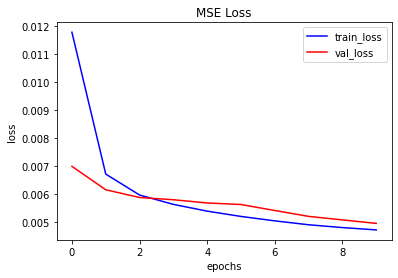

In [12]:
plt.plot(history.history['loss'], color = "blue", label = "train_loss")
plt.plot(history.history['val_loss'], color = "red", label = "val_loss")
plt.title("MSE Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

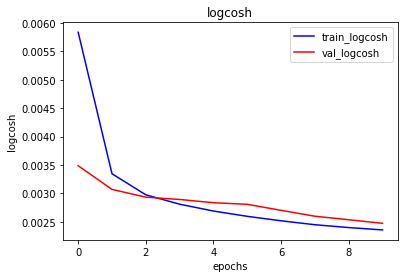

In [13]:
plt.plot(history.history['logcosh'], color = "blue", label = "train_logcosh")
plt.plot(history.history['val_logcosh'], color = "red", label = "val_logcosh")
plt.title("logcosh")
plt.xlabel("epochs")
plt.ylabel("logcosh")
plt.legend()
plt.show()

### Evaluate the model on the test data

In [14]:
evalutation = model.evaluate_generator(generator(X_test, y_test, batch_size), steps=X_test.shape[0]//batch_size, verbose=1)
print("Loss on test data = ", evalutation[0], "\nAnd logcosh metric on test data = ", evalutation[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


15/15 [==============================] - 7s 434ms/step - loss: 0.0052 - logcosh: 0.0026
Loss on test data =  0.005192223004996777 
And logcosh metric on test data =  0.002583310706540942


### Predict & display the output of test data 

In [15]:
prediction = model.predict(X_test, batch_size)

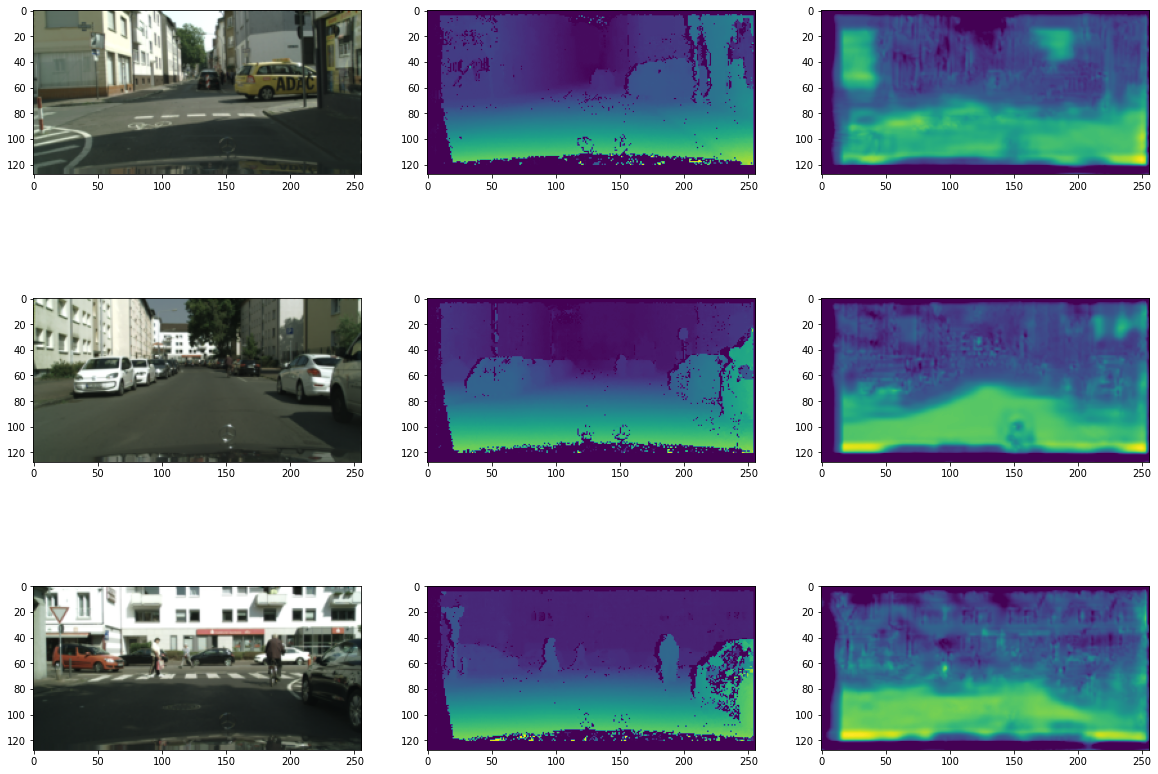

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.imshow(X_test[0,:,:,:])
plt.subplot(3,3,2)
plt.imshow(y_test[0,:,:,:].squeeze())
plt.subplot(3,3,3)
plt.imshow(prediction[0,:,:,:].squeeze())

plt.subplot(3,3,4)
plt.imshow(X_test[1,:,:,:])
plt.subplot(3,3,5)
plt.imshow(y_test[1,:,:,:].squeeze())
plt.subplot(3,3,6)
plt.imshow(prediction[1,:,:,:].squeeze())

plt.subplot(3,3,7)
plt.imshow(X_test[2,:,:,:])
plt.subplot(3,3,8)
plt.imshow(y_test[2,:,:,:].squeeze())
plt.subplot(3,3,9)
plt.imshow(prediction[2,:,:,:].squeeze())